# <strong>K NEAREST NEIGHBORS:</strong>

We will be exploring the <strong>K-Nearest Neighbours</strong> machine learning algorithm, modelling a customer dataset related to a telecommunication company.

<strong>BACKGROUND:</strong><br><br>A telecommunications provideer has segmented its customer base by service usage patterns, categorizing the customers into four groups. The premise is that the  demographic data can be used to predict group membership, allowing the company to leverage customized offers for individual prospective customers.

The dataset <a href="..//..//csv_datasets//classification_csvs//knn_csvs//teleCust1000t.csv" class="buttom">teleCust1000t.csv</a> is provided for completing this task.

The <strong>target field</strong> is <code>custcat</code> with the following possible values:

<ol>
<li> Basic Service
<li> E-Service
<li> Plus Service
<li> Total Service
</ol>

---

In [122]:
# Importing necessary modules

from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [123]:
dfa = pd.read_csv("..//..//csv_datasets//classification_csvs//knn_csvs//teleCust1000t.csv")

<strong>Data Analysis/Visualisation</strong>:

In [124]:
dfa['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

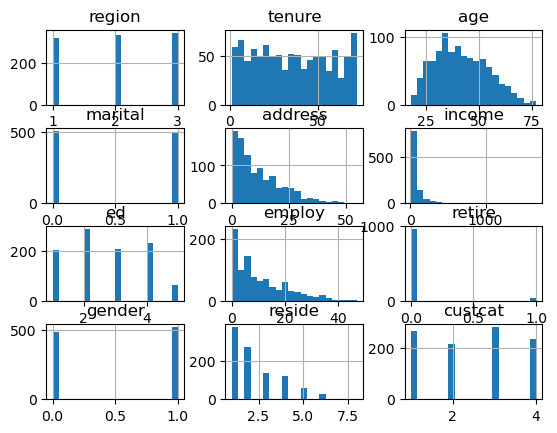

In [125]:
dfa.hist(bins=20)
plt.show()

<strong>Feature set</strong>:

In [126]:
dfa.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [127]:
X = dfa[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [128]:
y = dfa['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

<strong>Normalizing the Data</strong>:

In [129]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

<strong>Train Test Split</strong>:

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


<strong>Classification</strong>:

<strong>K nearest neighbor (KNN)</strong>:

In [134]:
from sklearn.neighbors import KNeighborsClassifier

<strong>Training</strong>:

In [135]:
k = 4

#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

<strong>Predicting</strong>:

In [136]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

<strong>Accuracy Evaluation</strong>:

In [137]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32
